In [1]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from padding_125to025_functions import find_face, reject_non_max, crop_img
from  tensorflow.keras.models  import  Sequential 

import cv2


# Chargement des images de test padding = 1.25 et recentrage 

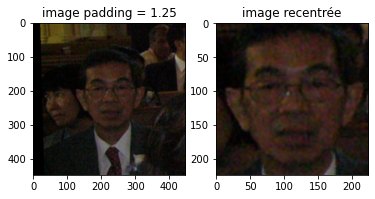

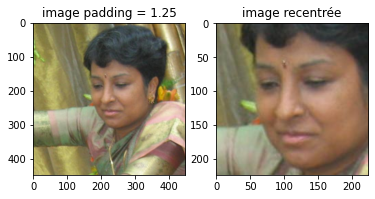

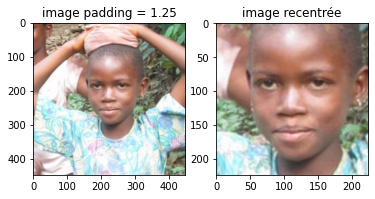

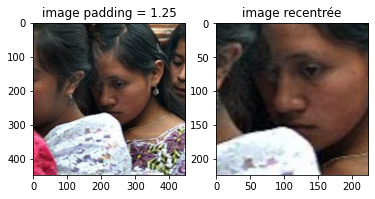

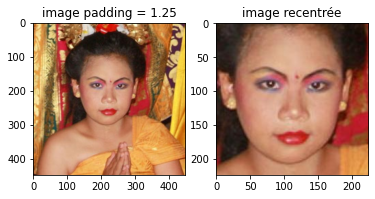

In [2]:
#chargement de la cascade de classifieur et definition des parametres
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') #classifieur pour trouver visage
scale = 1.1
min_detect = 4

#dictionnaire des ages
dic_ages = ['0-2','3-9','10-19','20-29','30-39','40-49','50-59','60-69','more than 70']

#lecture des 5 première images de tests en padding 1.25 et recentrage.
test = []
for i in range(5):
    path = "test_img/" + str(i+1)+'.jpg'
    img = cv2.imread(path)
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    #trouver les visages a l'aide du classifieur
    faces = find_face(img,face_cascade,scale,min_detect)
    
    #choix du "meilleur visage"
    best_face = reject_non_max(faces)
    
    #crop
    crop = crop_img(rgb,(224,224),best_face)
    test.append(crop)
    
    #affichage
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('image padding = 1.25')
    ax2.set_title('image recentrée')
    ax1.imshow(rgb)
    ax2.imshow(crop)

test = np.array(test)

#vérité de terrain des 5 premieres images de tests
label_test = np.load('label_fair_face.npz') 
label_test = label_test['ytrain'][:5]

# Modèle VGG pour la prédiction

In [3]:
#VGG model
model_path = "saved_model/"
model_name = "model_vgg"

model = Sequential( name = 'model' )
model = tf.keras.models.load_model(model_path+model_name)

# Estimation de l'âge des 5 images de tests

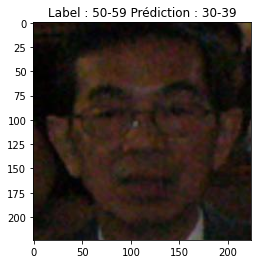

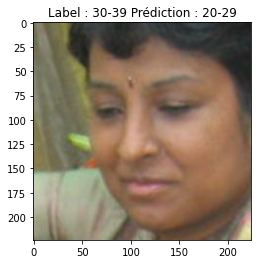

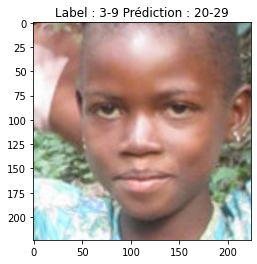

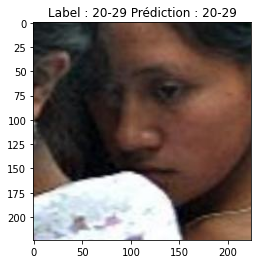

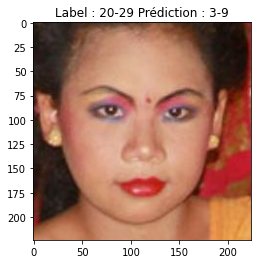

In [4]:
#prédiction
pred = model.predict(test) #prediction
label_pred = [np.argmax(j) for j in pred]

for i in range(5):
    plt.figure()
    plt.imshow(test[i])
    plt.title("Label : " + dic_ages[label_test[i]] +  " Prédiction : " + dic_ages[label_pred[i]])
    #print("Label : " + dic_ages[label_test[i]] +  " Prédiction : " + dic_ages[label_pred[i]])

# Modèle UTK pour la prédiction

In [5]:
#UTK model

model_path = "saved_model/"
model_name = "model_utk"

model = Sequential( name = 'model' )
model = tf.keras.models.load_model(model_path+model_name)

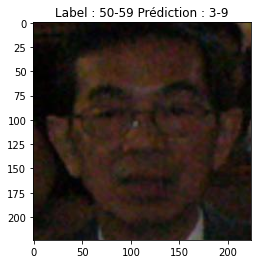

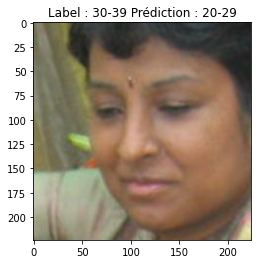

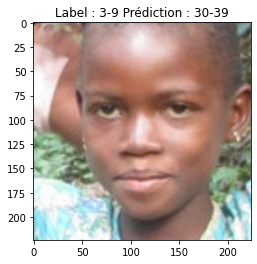

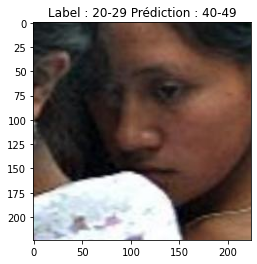

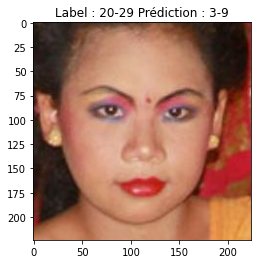

In [6]:
#prédiction
pred = model.predict(test) #prediction
label_pred = [np.argmax(j) for j in pred]

for i in range(5):
    plt.figure()
    plt.imshow(test[i])
    plt.title("Label : " + dic_ages[label_test[i]] +  " Prédiction : " + dic_ages[label_pred[i]])
    #print("Label : " + dic_ages[label_test[i]] +  " Prédiction : " + dic_ages[label_pred[i]])